In [48]:
def rule3(errA, errB):
    """
    If Q = A+B, errQ = sqrt(errA**2+errB**2)
    errA: The error in quantity A
    errB: The error in quantity B
    """
    errQ = np.sqrt(errA**2+errB**2)
    return errQ

def rule4(Q, A, errA, expA, B, errB, expB):
    """
    Q: The function that calculates the value that needs it's error determined.
    A: The function that calculates the value for A
    errA: The error in quantity A
    expA: The power (exponent) of quantity A
    ...and so on and so forth.
    """
    errQ = np.abs(Q) * np.sqrt((expA*(errA/A))**2+(expB*(errB/B))**2)
    return errQ

You will be taking data in all three channels, however you will only analyze the data from one channel.  Make 13 measurements within each channel.  For each measurement, record the position $r$ and the electric potential $V$.  Don’t forget to also record the uncertainty in the position $δr$ and the uncertainty in the potential $δV$.  If your measurements are made at equally spaced positions, some later calculations will be easier.


1.  Before connecting to the source of D.C. power make sure to connect the positive terminal to the outer circle and the negative terminal to the inner circle.


2.  The ground lead on the digital voltmeter (COM port) should be connected to the point holding the negative lead to the inner circle.


3.  The probe is used to measure the potential at various points on the paper.


4.  Check to make sure there is contact between the aluminum and the banana jack by placing the probe on the outer ring, then turn on the power supply and increase the potential difference (voltage) to $12 Volts$.  Confirm the zero of the centimeter scale along the measurement channels is placed at the center of the two circles.


5.  Choose one of the three channels and starting at the outer ring, measure and record the potential $V$ at intervals of $0.50cm$.  The first point will be $r= 7.0cm$ from the middle.


6.  The  potential  should  depend  only  upon $r$.   Check  this  by  taking  two  more  sets  of  measurements  along  the remaining measurement channels.


7.  When deciding which channel data to analyze, look for the data set that has the largest range and the least amount  of  random  scattering.   For  example,  the  electric  potential  should  either  be  only  increasing  or  only decreasing in value as you increase the radial distance.  If the electric potential increases, then decreases, then increases again as you increase the radial distance, then the channel is not a good choice.


8.  Calculate $E(r)$ for each consecutive set of measurements in your selected channel:


$E(r) =−\frac{∆V}{∆r}$


$∆V$ is the potential difference between consecutive measurements of V and ∆r is the distance between consecutive measurement, 0.50cm. 


$∆V=V_j−V_i$
Example:  $∆V_1=V_2-V_1, ∆V_2=V_3-V_2, ∆V_3=V_4-V_3$, etc.


9.  It is reasonable to assume that this value of $E(r)$ is at the midpoint of the interval, so we must calculate thatvalue which is just the average radius of two consecutive measurements. $r_{mid}$.


$r_{mid}=\frac{r_i+r_j}{2}$


Example:$r_{mid1}=\frac{r_2+r_1}{2},r_{mid}=\frac{r_3+r_2}{2}, r_{mid}=\frac{r_4+r_3}{2}$ etc.


10.  Calculate the $ln(E(r))$ and corresponding $ln(r_{mid})$ for a total of 12 paired values.


11.  Using your Python plotting code, plot $ln(E(r)/E_o)$ on the y-axis as a function of $ln(r_{mid}/r_o)$ on the x-axis. Remember $E_o= 1V/m$ and $r_0= 1m$. 


12.  Find the slope of the line

In [99]:
import numpy as np
import matplotlib as plt

# Data Set 1.

radius = np.array([7/100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range(1,12):
    radius[i] = radius[0]-(i*.005)
errR = 0.0005 # Meters
errDeltaR = rule3(errR, errR)
    
# Voltage Measurement at radius r[i]. 
V = np.array([8.52,8.45,8.15,7.9,7.85,7.72,7.62,7.40,7.05,6.76,6.12,5.55,5.01]) # Volts
errV = 0.0005 # Volts
print("Voltage:")
print(V, "volts")
print("δV",errV, "volts.")

# Change in voltage at between r[i+1] and r[i].
deltaV = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range(0,12):
    deltaV[i] = V[i+1]-V[i]
err_deltaV = rule3(errV, errV)
print("\n∆V:")    
print(deltaV, " volts.")
print("δ∆V:", err_deltaV, "volts.")

# Electric Potential at radius r[i]
Er = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
errEr = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range(0,12):
    Er[i] = (-1)*(deltaV[i]/0.0005)

print("\nE(r):")
print(Er)
errEr = rule4(Er, deltaV, err_deltaV, 1, 0.005, errDeltaR, 1)
print("δE(r):")
print(errEr)

# Radius value between two radii.
r_mid = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range(0,12):
    r_mid[i] = (radius[i+1]+radius[i])/2
err_r_mid = rule3(errDeltaR, errDeltaR)*.5
    
print("\nRadius midpoint:")
print(r_mid,"meters")
print("δRadius midpoint:",err_r_mid,"meters")


x = np.log(r_mid)
err_x = err_r_mid
print("\nln(r_mid/r_0):")
print(x)
print("δln(r_mid/r_0):",err_x)

y = np.log(Er)
err_y = np.log(Er+errEr)-np.log(Er)
print("\nln(E(r)/E_0):")
print(y)
print("δln(E(r)/E_0:\n",err_y)

Voltage:
[8.52 8.45 8.15 7.9  7.85 7.72 7.62 7.4  7.05 6.76 6.12 5.55 5.01] volts
δV 0.0005 volts.

∆V:
[-0.07 -0.3  -0.25 -0.05 -0.13 -0.1  -0.22 -0.35 -0.29 -0.64 -0.57 -0.54]  volts.
δ∆V: 0.0007071067811865475 volts.

E(r):
[ 140.  600.  500.  100.  260.  200.  440.  700.  580. 1280. 1140. 1080.]
δE(r):
[ 19.84943324  84.86459804  70.72481884  14.2126704   36.79673899
  28.31960452  62.24146528  99.00505038  82.03657721 181.02486017
 161.22654868 152.74161188]

Radius midpoint:
[0.0675 0.0625 0.0575 0.0525 0.0475 0.0425 0.0375 0.0325 0.0275 0.0225
 0.0175 0.0075] meters
δRadius midpoint: 0.0005 meters

ln(r_mid/r_0):
[-2.69562768 -2.77258872 -2.85597033 -2.94694211 -3.04702557 -3.1582512
 -3.28341435 -3.42651519 -3.59356927 -3.79423997 -4.0455544  -4.89285226]
δln(r_mid/r_0): 0.0005

ln(E(r)/E_0):
[4.94164242 6.39692966 6.2146081  4.60517019 5.56068163 5.29831737
 6.08677473 6.55108034 6.3630281  7.15461536 7.03878354 6.98471632]
δln(E(r)/E_0:
 [0.13258991 0.1322915  0.13229907 0.13

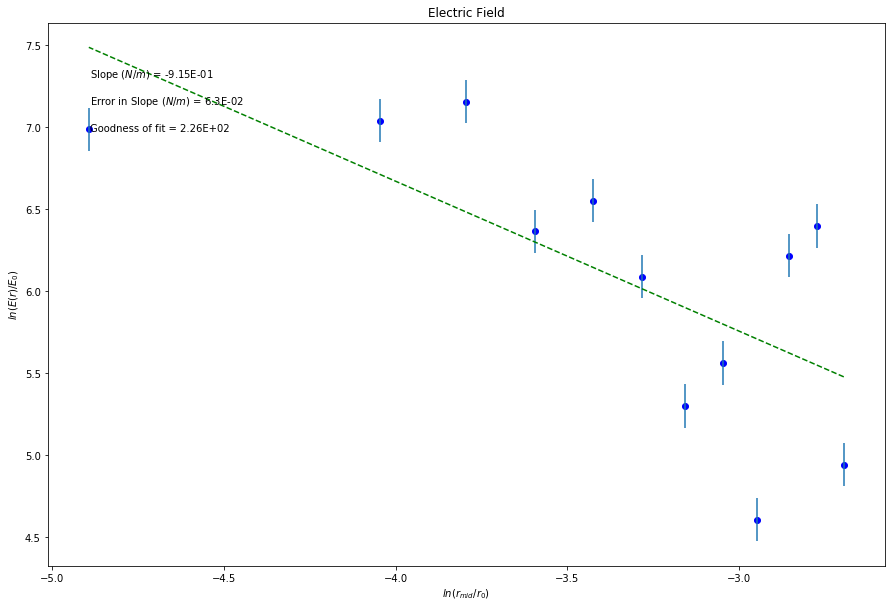

In [77]:
from __future__ import division
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.log(r_mid)   #this should be the array you want to plot on the x axis
y = np.log(Er)
dy = err_y  #this should be your error in y array

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('$ln(r_{mid}/r_0 )$')
plt.ylabel('$ln(E(r)/E_0 )$')
plt.title('Electric Field')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope ($N/m$) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope ($N/m$) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

#plt.savefig('Electric Field Plot', dpi=300)

plt.show()

Slope = $-0.915 \pm 0.063$